# Bagging

Le Bagging est le procédé d'extraire d'un ensemble un sous-ensemble plus petit. On crée ce sous-ensemble aléatoirement, grâce à un tirage avec remise.
Nous avons appliqué une méthode de Bagging qui s'appelle le Random Subspace, c'est-à-dire que nous appliquons notre bagging à l'ensemble des features à chaque fois qu'on crée un noeud. On va voir maintenant en condition réelle ses effets et conséquences.

[Retour au sommaire](../README.md#table-des-matières)

## Chargement des données et prétraitement

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

if os.getcwd().endswith("docs"):
    sys.path.append(os.path.join(os.getcwd(), ".."))

from ias import DecisionTree, PCA, split_dataset
from ias.Datasets import Emnist
from ias.Metrics import cross_validation, estimate_variance

In [2]:
emnist_train_x, emnist_train_y, emnist_test_x, emnist_test_y = split_dataset(1000, Emnist)

pca = PCA(0.90)
pca.fit(emnist_train_x)

emnist_compressed_train_x = pca.compress(emnist_train_x)
emnist_compressed_test_x = pca.compress(emnist_test_x)

## Comparaison sur différentes tailles de bagging : EMNIST

In [3]:
emnist_bagging_values = np.linspace(1, len(emnist_compressed_train_x[0]), 5, dtype=int)
emnist_score_by_bagging = np.zeros(len(emnist_bagging_values))

for index, bagging in enumerate(emnist_bagging_values):
    tree = DecisionTree(max_depth=8, do_bagging=True, subset_size=bagging)
    tree.fit(emnist_compressed_train_x, emnist_train_y)
    emnist_score_by_bagging[index] = cross_validation(tree, emnist_compressed_train_x,
                                                      emnist_train_y, 5).mean()

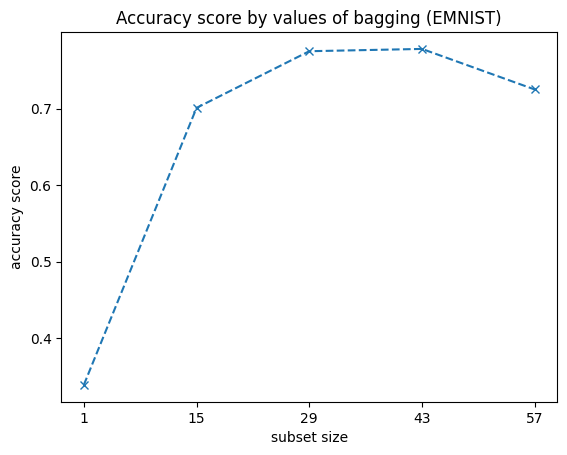

In [4]:
plt.plot(emnist_bagging_values, emnist_score_by_bagging, "--x")
plt.xticks(emnist_bagging_values)
plt.title("Accuracy score by values of bagging (EMNIST)")
plt.xlabel("subset size")
plt.ylabel("accuracy score")
plt.show()

In [5]:
emnist_bagging_values = np.linspace(1, len(emnist_compressed_train_x[0]), 5)
emnist_score_by_bagging = np.zeros(len(emnist_bagging_values))

for index, bagging in enumerate(emnist_bagging_values):
    tree = DecisionTree(max_depth=8, do_bagging=True, subset_size=int(bagging))
    tree.fit(emnist_compressed_train_x, emnist_train_y)
    emnist_score_by_bagging[index] = estimate_variance(emnist_test_y,
                                                       tree.predict(emnist_compressed_train_x),
                                                       tree.predict(emnist_compressed_test_x))

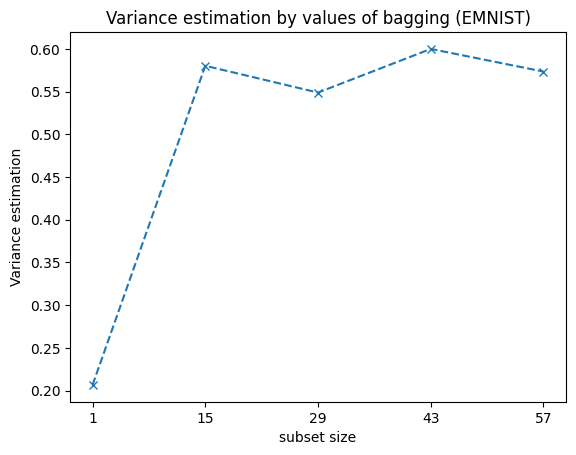

In [6]:
plt.plot(emnist_bagging_values, emnist_score_by_bagging, "--x")
plt.xticks(emnist_bagging_values)
plt.title("Variance estimation by values of bagging (EMNIST)")
plt.xlabel("subset size")
plt.ylabel("Variance estimation")
plt.show()

### Conclusions

On observe que sur un simple Decision Tree, utiliser du bagging affecte peu l'accuracy. En prenant une trentaine de feature au lieu de la totalité (environs 60) On a la même précision.
Par contre, on observe que la variance est un peu plus faible, on comprend que rajouter artificiellement du biais (le tirage s'effectue aléatoirement avec remise) fait baisser la variance.
L'intérêt du bagging est donc de simplifier les calculs, en améliorant la variance pour une efficacité semblable.

[Retour au sommaire](../README.md#table-des-matières)